In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import copy

In [2]:
#decide to change from s to i
def choose(q,i, numS, samples):
    p = 1-q**i
    weighted = random.choices(samples, weights = (1-p, p), k=numS)
    return weighted

Network to simulate reedfrost:

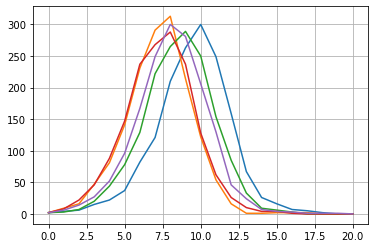

In [15]:
def infect(G, q):
    choices = ['s','i']
    I = []
    R = []
    infected = list(dict( (n,d['val']) for n,d in G.nodes().items() if d['val'] == 'i'))
    for i in range(len(G.nodes)):
        if G.nodes[i]['val'] == 's':
            neighbors = list(G.adj[i]) # find all nodes connected to node i with ['val'] == 'i'
            infectedNeighbors = list(set(neighbors).intersection(set(infected)))
            p = 1-q**len(infectedNeighbors)
            choose = random.choices(choices, weights=(1-p, p), k=1)
            if choose[0] == 'i':
                I.append(i)
        elif G.nodes[i]['val'] == 'i':
            R.append(i)
    return [I, R]

def start(G, n):
    for i in range(n):
        length = len(G.nodes())
        num = random.randrange(length)
        G.nodes[num]['val'] = 'i'

def networkModel():
    #build network and set all to susceptible
    s = 2000
    G = nx.complete_graph(s)

    for i in G:
        G.nodes[i]['val'] = 's'
    numGen = 20
    q = .999
    i = 2

    hist = []
    I = [i]
    start(G,i)
    hist.append(G)

    #infect netwok
    for i in range(numGen):
        output = infect(G,q)
        I.append(len(output[0]))

        for j in output[0]:
            G.nodes[j]['val'] = 'i'
        for r in output[1]:
            G.nodes[r]['val'] = 'r'

    plt.plot(I)

numRep = 5
for i in range(numRep):
    networkModel()

plt.grid()
plt.show()

Network with broken ties:

In [36]:
# removes p percent of edges
def removeRandom(G, p):
    num = int(len(G.edges)*p)
    i = 0
    while i < num:
        u = random.randint(0, len(G.nodes)-1)
        v = random.randint(0, len(G.nodes)-1)
        if G.has_edge(u,v):
            G.remove_edge(u,v)
            i+=1

#simulates one time interval of infection
def infect(G, q):
    choices = ['s','i']
    I = []
    R = []
    infected = list(dict( (n,d['val']) for n,d in G.nodes().items() if d['val'] == 'i'))
    for i in range(len(G.nodes)):
        if G.nodes[i]['val'] == 's':
            neighbors = list(G.adj[i]) # find all nodes connected to node i with ['val'] == 'i'
            infectedNeighbors = list(set(neighbors).intersection(set(infected)))
            p = (1-q**len(infectedNeighbors))*.8 #---------------------------------------------------------------------------
            choose = random.choices(choices, weights=(1-p, p), k=1)
            if choose[0] == 'i':
                I.append(i)
        elif G.nodes[i]['val'] == 'i':
            R.append(i)
    return [I, R]

#sets n nodes to infected randomly to start the model
def start(G, n):
    while n > 0:
        length = len(G.nodes())
        num = random.randrange(length)
        if G.nodes[num]['val'] == 's':
            G.nodes[num]['val'] = 'i'
            n-=1


Rep: 1
Number of Edges: 1599200
Total infected: 1295
Peak infected: 156

Rep: 2
Number of Edges: 1599200
Total infected: 1285
Peak infected: 171

Rep: 3
Number of Edges: 1599200
Total infected: 4
Peak infected: 2


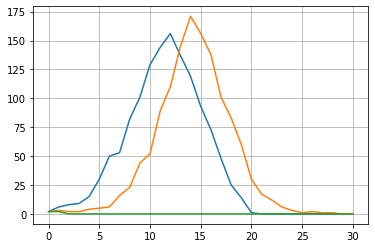

In [37]:
#complete model
def brokenNetworkModel():
    #parameters
    s = 2000
    p = 0 #change prob here -------------------------------------------------------------
    numGen = 30
    q = .999
    i = 2

    #build network and infect first interval
    G = nx.complete_graph(s)   
    for j in G:
        G.nodes[j]['val'] = 's'
    removeRandom(G, p)
    print(f'Number of Edges: {G.number_of_edges()}')
    I = [i]
    start(G,i)

    #infect numGen intervals of the network
    for i in range(numGen):
        output = infect(G,q)
        I.append(len(output[0]))

        for j in output[0]:
            G.nodes[j]['val'] = 'i'
        for r in output[1]:
            G.nodes[r]['val'] = 'r'

    #plot data and output data
    plt.plot(I)
    print(f'Total infected: {sum(I)}')
    print(f'Peak infected: {max(I)}')

#re-runs the model numRep number of times
numRep = 3
for i in range(numRep):
    print(f'\nRep: {i+1}')
    brokenNetworkModel()

plt.grid()
plt.show()

In [35]:
#As p increases, the peak decreases and the length of time of the infection increases slightly
#As q decreases, the peak increases and the length of time of the infection decreases significantly